# Session 2, Landcover exercise

In [120]:
pwd

'/home/omniteal/Documents/Repos/NORBIS-DLN-Collaboration-School'

For whatever reason, reading from the bz2 archive was fucking things up

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%%time
map_array = np.fromfile('gl-latlong-1km-landcover.bsq', dtype=np.uint8)
map_array = map_array.reshape(21600,43200)

CPU times: user 9.67 ms, sys: 1.74 s, total: 1.75 s
Wall time: 1.82 s


In [5]:
map_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12]], dtype=uint8)

In [6]:
width = map_array.shape[0]
height = map_array.shape[1]

In [7]:
map_array[12, 56]

0

Converting degrees into pixel coordinates:

In [8]:
upper_left_x, upper_left_y = 0, 0
lower_right_x, lower_right_y = width, height

Sahara: <br>
23 N 13 E
<br>
Something random: <br>
48.95˚N 9.13˚E

Positive: N & E

Negative: S & W

Latitude: N & S

Longitude: E & W

In [9]:
map_array.shape

(21600, 43200)

In [10]:
input_lat = 23
input_lon = 13

In [19]:
lat_to_pix = int((90-input_lat)/0.008333)
lon_to_pix = int((180+input_lon)/0.008333)

print(lat_to_pix, lon_to_pix)

8040 23160


In [20]:
map_array[lat_to_pix, lon_to_pix]

12

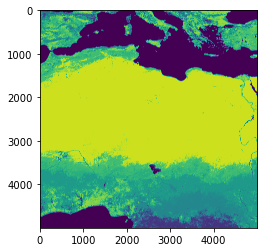

In [13]:
vis_box_x0 = max((lon_to_pix - 2500),0)
vis_box_y0 = max((lat_to_pix - 2500),0)
plt.imshow(map_array[vis_box_y0:vis_box_y0+5000:, vis_box_x0:vis_box_x0+5000:])

## Coordinates string test:

In [60]:
# coordinates_test = "90˚N 9.13˚E"
coordinates_test = "90 N 9.13 E"

In [63]:
coordinates_test.split(" ")[2]

'9.13'

In [55]:
try:
    lat_direction = coordinates_test.split(" ")[0].replace("˚", " ").split(" ")[1]
except IndexError:
    lat_direction = coordinates_test.split(" ")[1]
lat_direction

'N'

In [58]:
assert "˚" in "90 N 9.13E"

AssertionError: 

In [64]:
def strip_coord_str(input_str):
    if "˚" in input_str:
        lat_direction = coordinates_test.split(" ")[0].replace("˚", " ").split(" ")[1]
        lon_direction = input_str.split(" ")[1].replace("˚", " ").split(" ")[1]
        lat_coord = float(input_str.split(" ")[0].replace("˚", " ").split(" ")[0])
        lon_coord = float(input_str.split(" ")[1].replace("˚", " ").split(" ")[0])
    else:
        lat_direction = coordinates_test.split(" ")[1]
        lat_direction = coordinates_test.split(" ")[3]
        lat_coord = float(input_str.split(" ")[0])
        lon_coord = float(input_str.split(" ")[2])
        
    return 

In [70]:
direction_dict = {
    "N" : 1,
    "E" : 1,
    "S" : -1,
    "W" : -1,
}

def degrees_to_pixels(input_str="48.95˚N 9.13˚E"):
    
    if "˚" in input_str:
        lat_direction = input_str.split(" ")[0].replace("˚", " ").split(" ")[1]
        lon_direction = input_str.split(" ")[1].replace("˚", " ").split(" ")[1]
        lat_coord = float(input_str.split(" ")[0].replace("˚", " ").split(" ")[0])
        lon_coord = float(input_str.split(" ")[1].replace("˚", " ").split(" ")[0])
    else:
        lat_direction = coordinates_test.split(" ")[1]
        lat_direction = coordinates_test.split(" ")[3]
        lat_coord = float(input_str.split(" ")[0])
        lon_coord = float(input_str.split(" ")[2])

    lat_direction = direction_dict[lat_direction]
    lon_direction = direction_dict[lon_direction]
    
    lat_coord = int((90-lat_coord)/0.008333)
    lon_coord = int((180+input_lon)/0.008333)
    
    return lat_direction*lat_coord, lon_direction*lon_coord

In [69]:
degrees_to_pixels()

(4926, 23160)

In [23]:
lat_pix, lon_pix = degrees_to_pixels(coordinates_test)
lat_pix

4926

In [30]:
map_array[lat_pix, lon_pix]

6

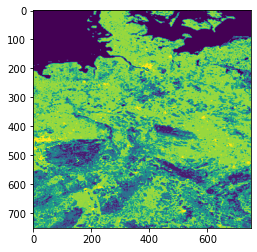

In [28]:
vis_box_x0 = max((lon_pix - 750),0)
vis_box_y0 = max((lat_pix - 750),0)
plt.imshow(map_array[vis_box_y0:vis_box_y0+750:, vis_box_x0:vis_box_x0+750:])